# Housing Price Prediction ML assignment
## E20022-Prashantha

In [1]:
#import the packages we are going to be using
import numpy as np # for getting our distribution
import matplotlib.pyplot as plt # for plotting
import seaborn as sns; sns.set() # For a different plotting theme
from scipy import stats
import pandas as pd
from sklearn.model_selection import ShuffleSplit


In [2]:

from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
%matplotlib inline

In [3]:
house_train_data = pd.read_csv("wk3_kc_house_train_data.csv")
house_test_data = pd.read_csv("wk3_kc_house_test_data.csv")
house_valid_data = pd.read_csv("wk3_kc_house_valid_data.csv")
house_train_validate_data =pd.read_csv("book2.csv") 
combined = pd.read_csv("House_train_validate_test_combined.csv")

In [4]:
house_train_data.shape

(9761, 21)

In [5]:
house_test_data.shape

(2217, 21)

In [6]:
house_valid_data.shape

(9635, 21)

In [7]:
house_train_data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [8]:
# Getting Description
house_train_data['price'].describe()

count    9.761000e+03
mean     5.428336e+05
std      3.797779e+05
min      8.000000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.490000e+05
max      7.700000e+06
Name: price, dtype: float64

In [9]:
house_train_data['price'].median()

450000.0


 mu = 542833.59 and sigma = 379758.50



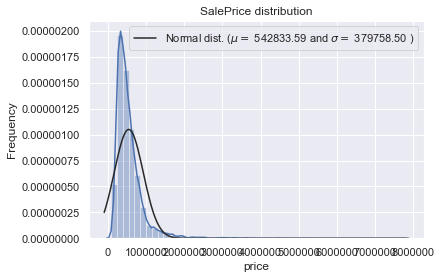

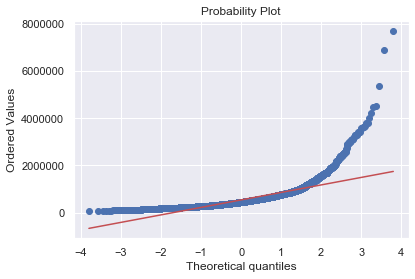

Skewness: 4.296023
Kurtosis: 38.871048


In [10]:
# Plot Histogram
sns.distplot(house_train_data['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(house_train_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(house_train_data['price'], plot=plt)
plt.show()

print("Skewness: %f" % house_train_data['price'].skew())
print("Kurtosis: %f" % house_train_data['price'].kurt())


 mu = 2086.73 and sigma = 927.15

Skewness: 1.425826
Kurtosis: 4.563591


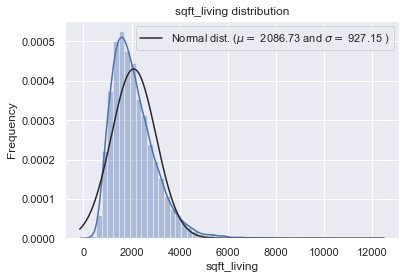

In [11]:
# Plot Histogram
sns.distplot(house_train_data['sqft_living'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(house_train_data['sqft_living'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('sqft_living distribution')

print("Skewness: %f" % house_train_data['sqft_living'].skew())
print("Kurtosis: %f" % house_train_data['sqft_living'].kurt())

In [11]:
cat = len(house_train_data.select_dtypes(include=['object']).columns)
num = len(house_train_data.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  1 categorical + 20 numerical = 21 features


In [12]:
house_train_data["sqft_living_grp"] = pd.cut(house_train_data.sqft_living, [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000])
house_train_data["price_grp"] = pd.cut(house_train_data.price, [0,100000,200000,300000,400000,500000,600000,700000,800000,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000])
x=pd.crosstab(house_train_data["price_grp"],house_train_data["sqft_living_grp"])
x

sqft_living_grp,"(0, 1000]","(1000, 2000]","(2000, 3000]","(3000, 4000]","(4000, 5000]","(5000, 6000]","(6000, 7000]","(7000, 8000]","(8000, 9000]","(9000, 10000]"
price_grp,,,,,,,,,,
"(0, 100000]",11,1,0,0,0,0,0,0,0,0
"(100000, 200000]",146,213,4,0,0,0,0,0,0,0
"(200000, 300000]",211,1311,193,2,0,0,0,0,0,0
"(300000, 400000]",188,1120,565,48,0,0,0,0,0,0
"(400000, 500000]",98,923,539,82,10,1,0,0,0,0
"(500000, 600000]",24,546,552,114,11,0,0,0,0,0
"(600000, 700000]",8,288,467,121,9,2,0,0,0,0
"(700000, 800000]",3,107,281,177,14,3,0,0,0,0
"(800000, 1000000]",0,71,281,277,51,6,0,0,0,0


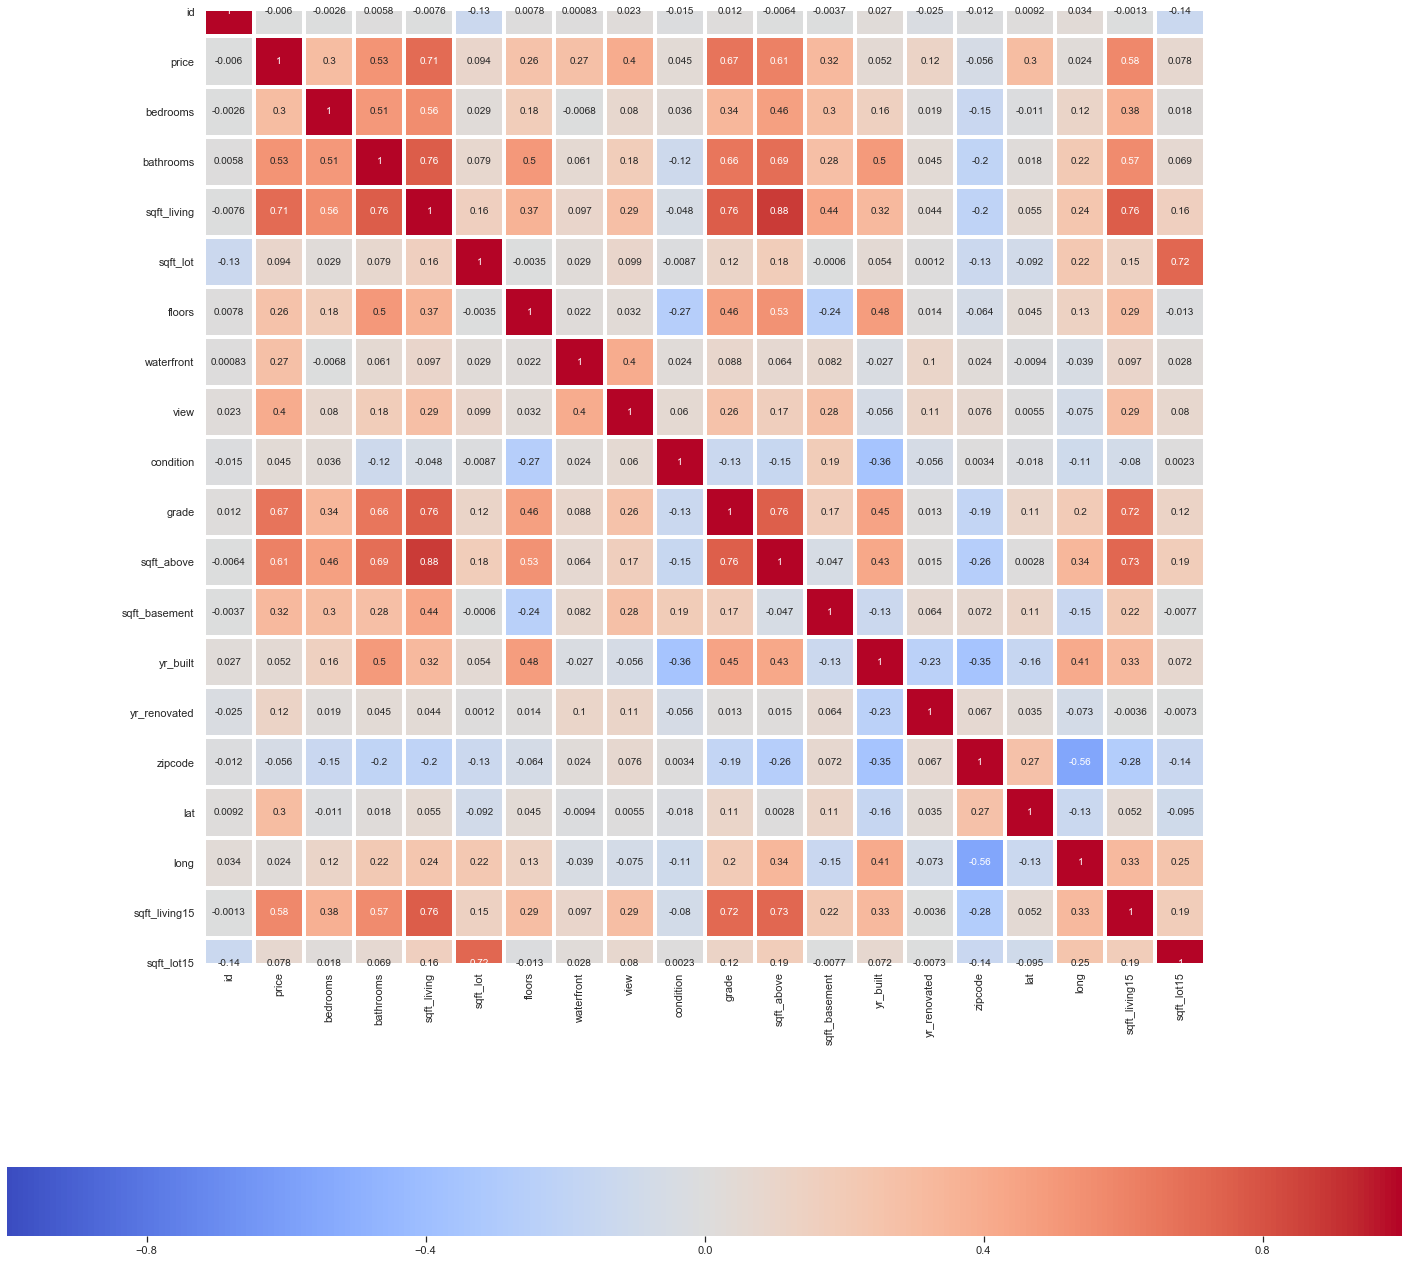

In [13]:
plt.rcParams['figure.figsize'] = (25.0, 25.0)

#fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(house_train_data.corr(),annot=True,linewidths=3, vmin=-1, vmax=1, center= 0,cmap= 'coolwarm',cbar_kws= {'orientation': 'horizontal'},square=True)#cbar=False,linecolor='black',

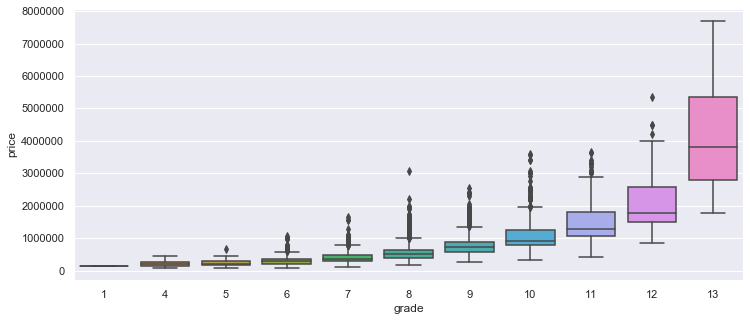

In [15]:
# Grade vs Sale Price
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
sns.boxplot(x="grade", y="price", data=house_train_data)  # Make boxplot of BPXSY1 stratified by age group

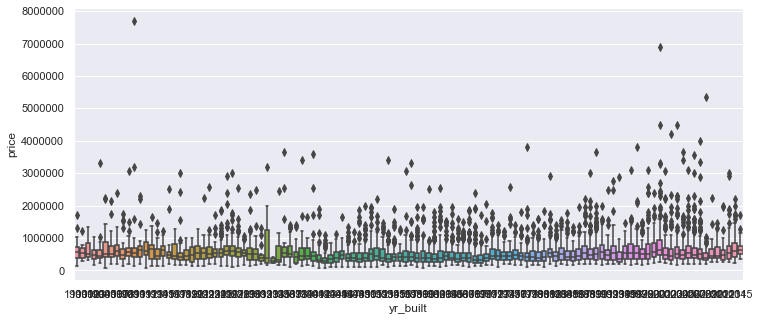

In [16]:
# yr_built vs Sale Price
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
sns.boxplot(x="yr_built", y="price", data=house_train_data)  # Make boxplot of BPXSY1 stratified by age group

In [17]:
# Combining Datasets
ntrain = house_train_data.shape[0]
ntest = house_test_data.shape[0]
y_train = house_train_data.price.values
all_data = pd.concat((house_train_data, house_test_data)).reset_index(drop=True)
all_data.drop(['price'], axis=1, inplace=True)
print("Train data size is : {}".format(house_train_data.shape))
print("Test data size is : {}".format(house_test_data.shape))
print("Combined dataset size is : {}".format(all_data.shape))

Train data size is : (9761, 23)
Test data size is : (2217, 21)
Combined dataset size is : (11978, 22)


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [18]:
# Find Missing Ratio of Dataset
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
sqft_living_grp,18.517282
price_grp,18.508933


## There is  no missing data

In [19]:
house_train_validate_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [20]:
house_train_data[house_train_data["price"]==7700000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living_grp,price_grp
3303,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,3480,1910,1987,98102,47.6298,-122.323,3940,8800,NaN,"(7000000, 8000000]"


In [21]:
house_train_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_living_grp',
       'price_grp'],
      dtype='object')

In [22]:
# The following line does these steps, reading the code from left to right:
# 1 Group the data by every combination of zipcode, price_grp, and sqft_living_grp 
# 2 Count the number of houses in each cell using the 'size' method
# 3 Pivot the sqft_living  results into the columns (using unstack)
# 4 Fill any empty cells with 0

g= house_train_data.groupby(["zipcode", "price_grp","sqft_living_grp"]).size().unstack().fillna(0)

In [23]:
zipg=house_train_data[["zipcode", "price_grp","sqft_living_grp"]].groupby(["zipcode"]).describe()
zipg[55:70]

price_grp                                 sqft_living_grp         \
            count unique                 top freq           count unique   
zipcode                                                                    
98125         183      8    (300000, 400000]   63             183      5   
98126         150      8    (300000, 400000]   42             150      4   
98133         250      6    (300000, 400000]  113             250      4   
98136         129     10    (400000, 500000]   34             129      5   
98144         151     10    (400000, 500000]   42             151      6   
98146         125     10    (200000, 300000]   45             125      4   
98148          26      5    (200000, 300000]   17              26      4   
98155         208     10    (300000, 400000]   77             208      6   
98166         101      9    (300000, 400000]   33             101      5   
98168         116      5    (200000, 300000]   61             116      4   
98177         122     10    (400000, 500000]   28             122      6   
98178         110     10    (200000, 300000]   53             110      5   
98188          57      6    (200000, 300000]   33              57      5   
98198         127      8    (200000, 300000]   71             127      4   
98199         140      8  (1000000, 2000000]   32             140      7   

                            
                  top freq  
zipcode                     
98125    (1000, 2000]  106  
98126    (1000, 2000]   81  
98133    (1000, 2000]  175  
98136    (1000, 2000]   73  
98144    (1000, 2000]   83  
98146    (1000, 2000]   66  
98148    (1000, 2000]   19  
98155    (1000, 2000]  109  
98166    (1000, 2000]   43  
98168    (1000, 2000]   80  
98177    (1000, 2000]   56  
98178    (1000, 2000]   60  
98188    (1000, 2000]   30  
98198    (1000, 2000]   85  
98199    (1000, 2000]   63

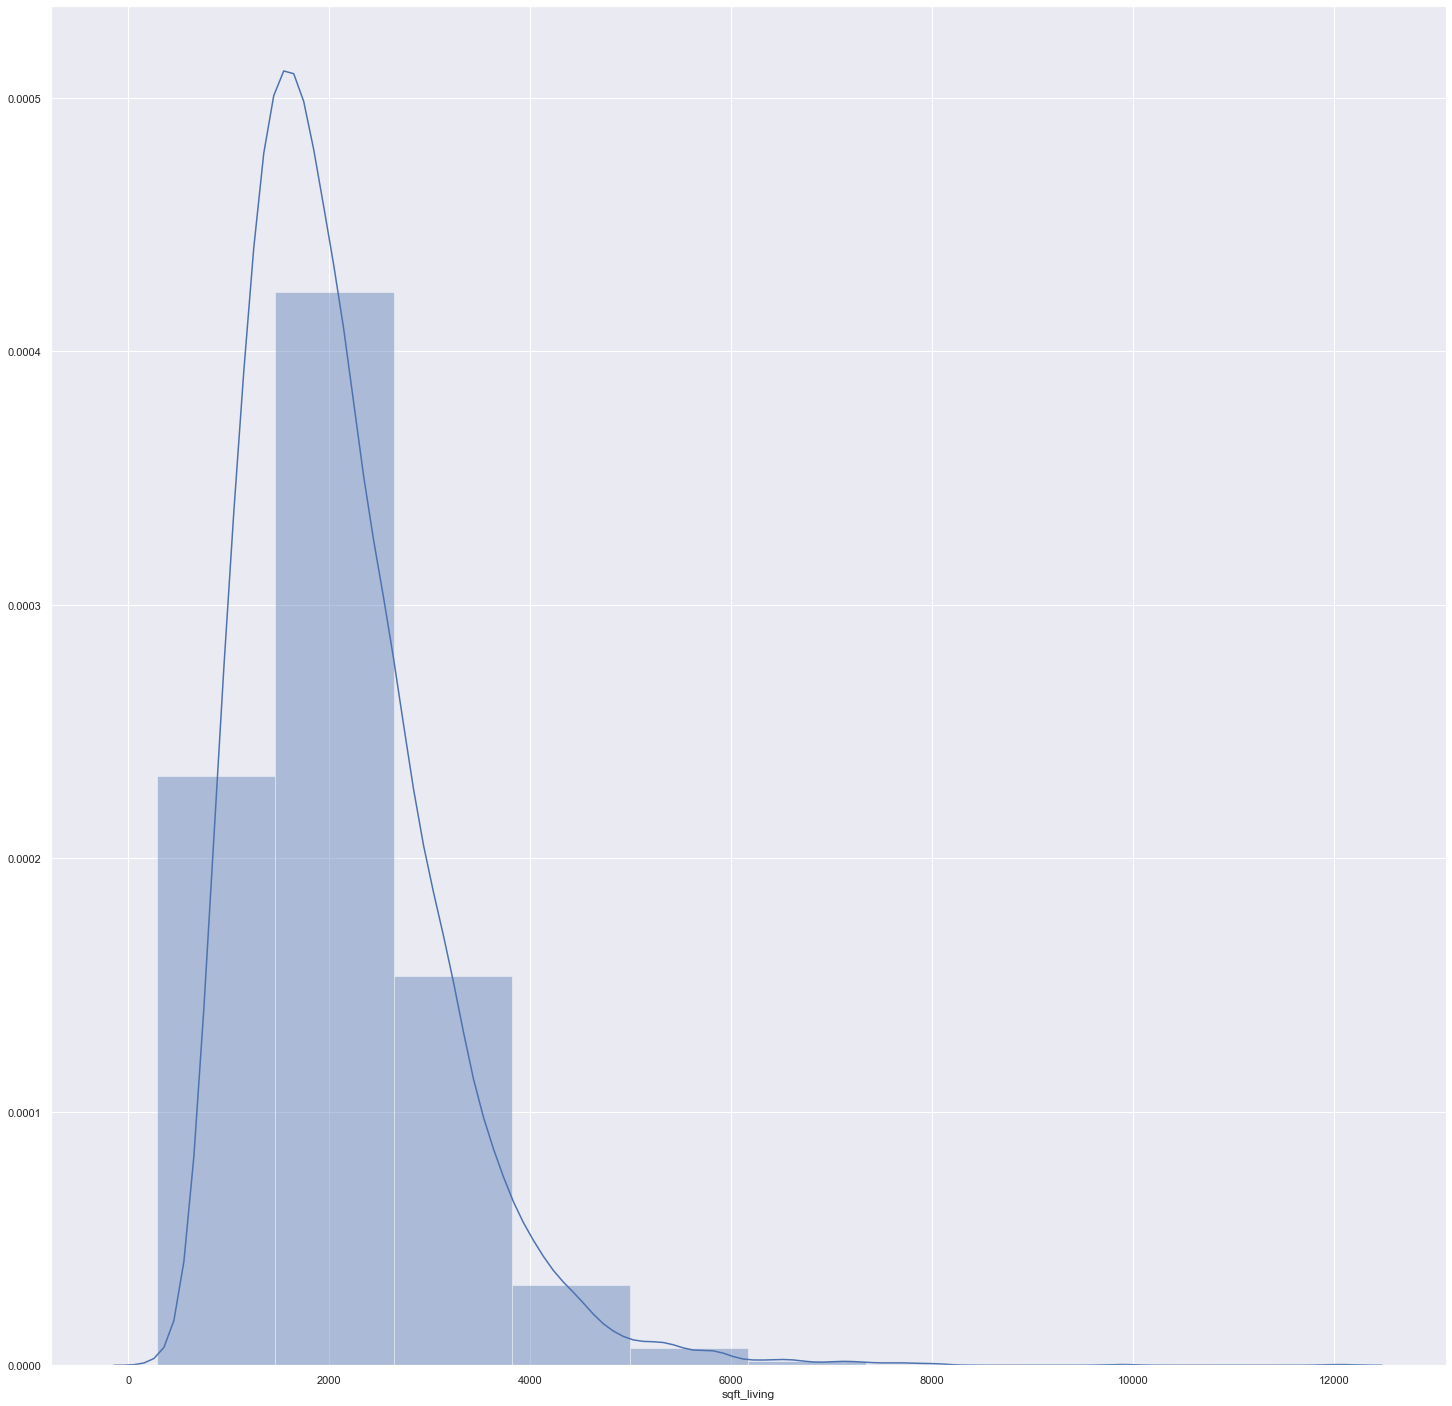

In [24]:
X=house_train_data['sqft_living']
Y=house_train_data['price']
sns.distplot(X, bins=10)


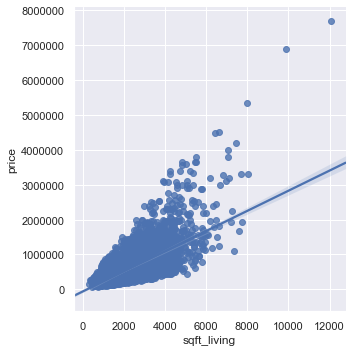

In [25]:

sns.lmplot(x='sqft_living', y='price', data=house_train_data)


## Feature Observation


As a reminder, we are using 5 features from the housing dataset based on the correlation ratios being high with target 'price' from the heatmap: 
['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']


In [14]:
price = house_train_data['price']
features = house_train_data[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]

# Simple regression model that predicts price from square feet

In [15]:

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
# create X and y
#feature_cols =[ 'sqft_living']
feature_cols=['sqft_living']
X = house_train_data[feature_cols]
y = house_train_data.price


# instantiate and fit
X_train = house_train_data[feature_cols]
X_test  = house_test_data[feature_cols]
y_train = house_train_data.price
y_test  = house_test_data.price



lm0 = LinearRegression()
lm0.fit(X_train, y_train)
lm0_preds = lm0.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm0_preds)))
print("R^2: ", r2_score(y_test, lm0_preds))

RMSE : 253395.6391455319
R^2:  0.49996055912346826


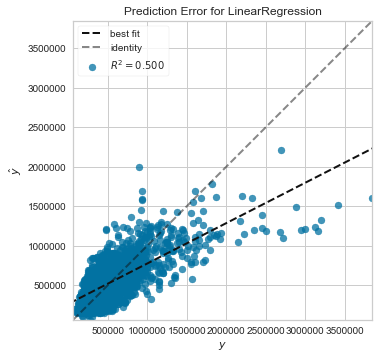

In [16]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm0)
#visualizer = PredictionError(model[139])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

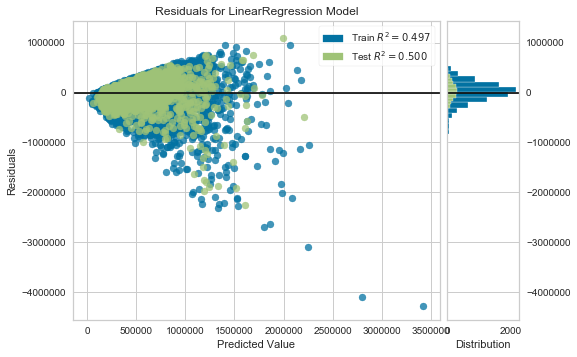

In [17]:
visualizer = ResidualsPlot(lm0)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.poof()

## Relationship between Features and Response

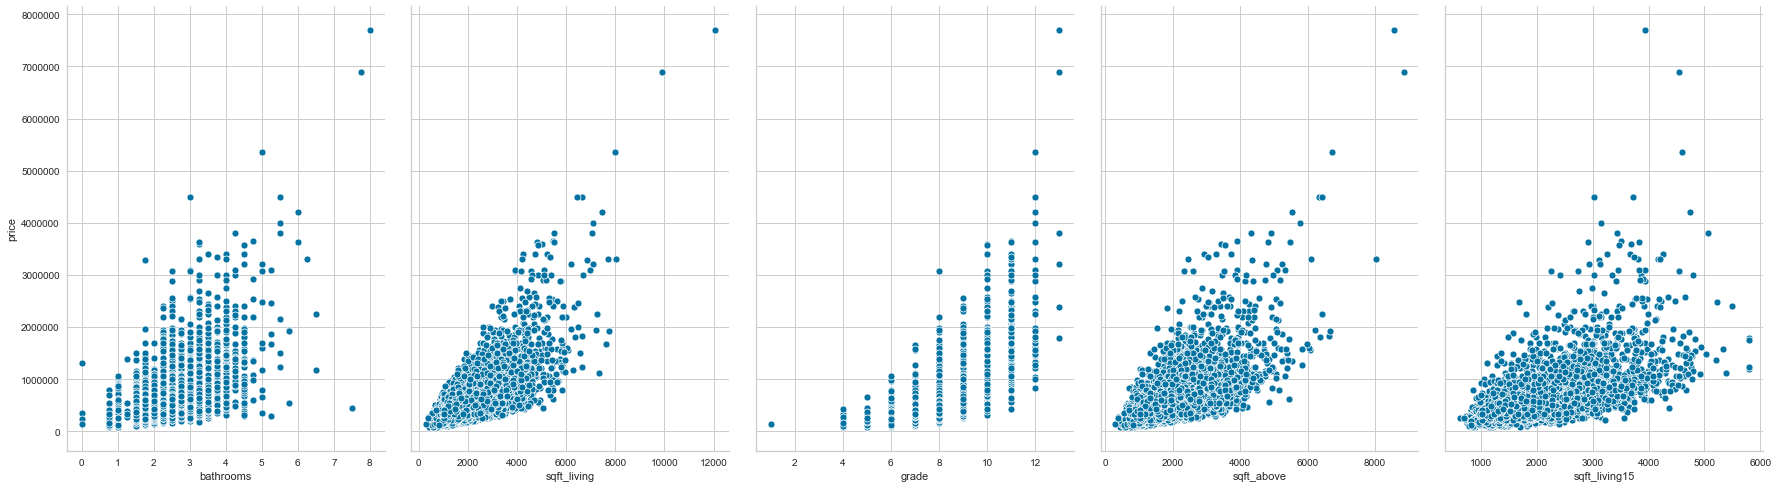

In [35]:
sns.pairplot(house_train_data, x_vars=['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15'], y_vars='price', height=7, aspect=0.7)

# Multiple Linear Regression - Estimating Coefficients

In [18]:
from sklearn.linear_model import LinearRegression

# create X and y
feature_cols =['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']
X = house_train_data[feature_cols]
y = house_train_data.price

# instantiate and fit
X_train = house_train_data[feature_cols]
X_test  = house_test_data[feature_cols]
y_train = house_train_data.price
y_test  = house_test_data.price

lm1 = LinearRegression()
lm1.fit(X, y)

# print the coefficients
print(lm1.intercept_)
print(lm1.coef_)

lm1_preds = lm1.predict(X[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']])
print("R^2: ", r2_score(y, lm1_preds))

-651525.5958052534
[-3.54246271e+04  2.53566477e+02  1.09700027e+05 -7.36009266e+01
  1.59376536e+01]
R^2:  0.5435937215678052


In [242]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm1.coef_))

[('bathrooms', -35424.62714401715),
 ('sqft_living', 253.56647651419448),
 ('grade', 109700.02672079807),
 ('sqft_above', -73.60092660412207),
 ('sqft_living15', 15.937653591125125)]

# Model Evaluation Using Train/Test Split 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# create X and y
feature_cols =['bedrooms','bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']

# instantiate and fit
X = house_train_validate_data[feature_cols]
y = house_train_validate_data.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm4 = LinearRegression()
lm4.fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE : 250780.9367634015
R^2:  0.5547064424711532


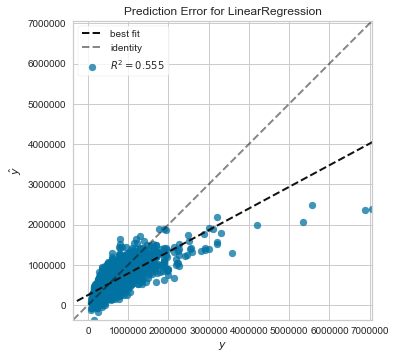

In [38]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm4)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

In [ ]:
visualizer = ResidualsPlot(lm4)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.poof()

## Adding more Features

In [20]:



from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# create X and y
All_feature_cols =['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'sqft_living15', 'sqft_lot15']
X = house_train_validate_data[All_feature_cols]
y = house_train_validate_data.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm6 = LinearRegression()
lm6.fit(X_train, y_train)
lm6_preds = lm6.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm6_preds)))
print("R^2: ", r2_score(y_test, lm6_preds))

RMSE : 225313.51500386934
R^2:  0.6405554882364075


In [21]:
#Predicting for Test Data
X_test  = house_test_data[feature_cols]
y_test  = house_test_data.price
lm4_preds = lm4.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE : 241670.36752320454
R^2:  0.5451661350736259


# Polynomial Regression
## Using sqft_living as the parameter [x^2,x^3...x^15]

In [22]:
def polynomial_dataframe(feature, degree):
    # assume that degree >= 1
    # initialize the dataFrame:
    
    poly_sframe = pd.DataFrame()
    
    poly_sframe['power_1'] = feature
    #print(poly_sframe)
    #first check if degree > 1
    if degree > 1:
    #    # then loop over the remaining degrees:
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature ** power
    return poly_sframe

In [23]:
print (polynomial_dataframe(house_test_data['sqft_living'], 3))

      power_1  power_2      power_3
0        1890  3572100   6751269000
1        1810  3276100   5929741000
2        1200  1440000   1728000000
3        2330  5428900  12649337000
4        1220  1488400   1815848000
...       ...      ...          ...
2212     1980  3920400   7762392000
2213     2198  4831204  10618986392
2214     2850  8122500  23149125000
2215     1140  1299600   1481544000
2216     1210  1464100   1771561000

[2217 rows x 3 columns]


In [24]:
def get_polynom_model(set_data,i):
    
    poly15_data = polynomial_dataframe(set_data['sqft_living'], i)
    my_features = poly15_data.columns # get the name of the features
    poly15_data['price'] = set_data['price'] # add price to the data since it's the target
    lmp = LinearRegression()
    lmp.fit(poly15_data[my_features], poly15_data['price'])
      

    return poly15_data, lmp

In [101]:
#RSS for upto ploynomial of order 15 for test data :

for i in range(1,16):
    
    
    poly15_data,model=get_polynom_model(house_train_validate_data,i)
    inputt = polynomial_dataframe(house_test_data['sqft_living'], i)
    predictions = model.predict(inputt)
    output = house_test_data['price']
    #RSS1 = (predictions - output)**2
    #print(i,RSS1.sum())
    
    print(i,"RMSE :", np.sqrt(mean_squared_error(output, predictions)))
    print("R^2: ", r2_score(output, predictions))


1 RMSE : 253340.8477391737
R^2:  0.5001767814877556
2 RMSE : 246883.3578445059
R^2:  0.5253323667647642
3 RMSE : 245713.85480613157
R^2:  0.5298187801979004
4 RMSE : 247727.1016391588
R^2:  0.5220823928462339
5 RMSE : 247808.751433344
R^2:  0.5217673017260064
6 RMSE : 247802.3905083139
R^2:  0.5217918526208475
7 RMSE : 247784.6045438756
R^2:  0.521860496735616
8 RMSE : 247760.48953368232
R^2:  0.521953559643505
9 RMSE : 247750.86196950986
R^2:  0.5219907111148258
10 RMSE : 247771.7003224456
R^2:  0.5219102969027704
11 RMSE : 247774.03256310517
R^2:  0.5219012964762422
12 RMSE : 247734.69476107555
R^2:  0.5220530949434364
13 RMSE : 247811.71281669685
R^2:  0.5217558716307782
14 RMSE : 247922.1806155073
R^2:  0.5213293998487987
15 RMSE : 247945.3046887743
R^2:  0.5212401030363585


#  3 order polynomial has the highest R2
3 RMSE : 245713.85480613157
R^2:  0.5298187801979004


# CrossValidation

In [25]:
def split_data(n,X, Y ):
    size=X.shape[0] #total size of the data
   
    s =np.sqrt(X1.shape[0])
  
    fold =int(s) #number of samples in each set
    print(n,X.shape[0],Y.shape[0],"fold=",fold)
    
    X1_test = X.loc[n:n+fold-1,['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
    y1_test = Y.loc[n:n+fold-1,["price"]]
    
    
    X10_train  = X.loc[n+fold:size-1,['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
    y10_train  = Y.loc[n+fold:size-1,["price"]]
    X20_train  = X.loc[0:n-1,['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
    y20_train  = Y.loc[0:n-1,["price"]]
    
    X1_train = pd.concat([X20_train,X10_train])
    y1_train = pd.concat([y20_train,y10_train])
    
    
    
    
    print("After split",X1_test.shape[0],y1_test.shape[0],X1_train.shape[0],y1_train.shape[0],"Split starts at",n)
    
    #print(X1_train)
        
    return X1_train, X1_test, y1_train, y1_test
        

        
    

In [26]:
X=house_train_validate_data[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
y=house_train_data[['price']]
#split_data(10,X,y)

In [27]:
#Cross Validation on Training and testing on test data...
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression



X1=house_train_data[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
y1=house_train_data[['price']]

X_test=house_test_data[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
y_test=house_test_data[['price']]



#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

s =np.sqrt(X.shape[0])
RMSE_train = []
RMSE_test  = []

R2_Train = []
R2_Test  = []

n =int(s) #number of samples in each set
size=X1.shape[0] #total size of the data
print(n,X1.shape[0],y1.shape[0])


i=0
while i<size:
     
    X1_train, X1_test, y1_train, y1_test=split_data(i,X1,y1) # get the split data
    
    lm = LinearRegression()
    lm.fit(X1_train, y1_train)
    lm_preds = lm.predict(X1_test)
    valuet=np.sqrt(mean_squared_error(y1_test, lm_preds))
    print("RMSE Train :",valuet) 
    RMSE_train.append(valuet)
    i=i+n #move to next sample
    #print(i)
    
    #print("RMSE :", np.sqrt(mean_squared_error(y_test, predictions)))
    r2_traint=r2_score(y1_test, lm_preds)
    R2_Train.append(r2_traint)
    print("R^2 train: ", r2_score(y1_test, lm_preds))
    
    predictions = lm.predict(X_test)
    value2=np.sqrt(mean_squared_error(y_test, predictions))
    RMSE_test.append(value2) 
    print("RMSE :", np.sqrt(mean_squared_error(y_test, predictions)))
    print("R^2 test: ", r2_score(y_test, predictions))
    r2_testt=r2_score(y_test, predictions)
    R2_Test.append(r2_testt)
    
    
#print("Array RMSE train -->",RMSE_train)
#print("Array RMSE test -->",RMSE_test)

avg_RMSE_train=sum(RMSE_train)/len(RMSE_train)
avg_RMSE_test=sum(RMSE_test)/len(RMSE_test)
print("Average RMSE train = ",avg_RMSE_train )
print("Average RMSE test = ",avg_RMSE_test )

#print("Array R2 train -->",R2_train)
#print("Array R2 test -->",R2_test)

import numpy as np
a=np.array(R2_Train)
b= np.array(R2_Test)
df=pd.DataFrame({'R2_Train':a, 'R2_Test': b})
print(df.head(35))
print(df.tail(35))



139 9761 9761
0 9761 9761 fold= 98
After split 98 98 9663 9663 Split starts at 0
RMSE Train : 197992.88803097667
R^2 train:  0.45514262393012117
RMSE : 242972.41175876727
R^2 test:  0.5402519277646863
139 9761 9761 fold= 98
After split 98 98 9663 9663 Split starts at 139
RMSE Train : 186743.77501855217
R^2 train:  0.5419099080238948
RMSE : 242972.41887006292
R^2 test:  0.5402519008529518
278 9761 9761 fold= 98
After split 98 98 9663 9663 Split starts at 278
RMSE Train : 302192.89832130785
R^2 train:  0.531978759992098
RMSE : 242938.4314967259
R^2 test:  0.5403805124664856
417 9761 9761 fold= 98
After split 98 98 9663 9663 Split starts at 417
RMSE Train : 151948.62538289893
R^2 train:  0.4866088607773482
RMSE : 242980.8974774458
R^2 test:  0.5402198141522698
556 9761 9761 fold= 98
After split 98 98 9663 9663 Split starts at 556
RMSE Train : 275636.08898197475
R^2 train:  0.40907664998377735
RMSE : 242964.98861753516
R^2 test:  0.540280019206955
695 9761 9761 fold= 98
After split 98 98 9

RMSE Train : 219460.91862736232
R^2 train:  0.5672213420202803
RMSE : 242967.9800305814
R^2 test:  0.5402686988860983
6255 9761 9761 fold= 98
After split 98 98 9663 9663 Split starts at 6255
RMSE Train : 272870.04668474
R^2 train:  0.4135826969135499
RMSE : 242954.99846877108
R^2 test:  0.5403178236379897
6394 9761 9761 fold= 98
After split 98 98 9663 9663 Split starts at 6394
RMSE Train : 222957.41486208557
R^2 train:  0.6361202152399538
RMSE : 242956.01451388525
R^2 test:  0.5403139788205633
6533 9761 9761 fold= 98
After split 98 98 9663 9663 Split starts at 6533
RMSE Train : 233435.6867660482
R^2 train:  0.48335352554389743
RMSE : 242969.27529244768
R^2 test:  0.5402637972195478
6672 9761 9761 fold= 98
After split 98 98 9663 9663 Split starts at 6672
RMSE Train : 195696.71915052284
R^2 train:  0.46219912347887593
RMSE : 242978.02751834682
R^2 test:  0.5402306754384754
6811 9761 9761 fold= 98
After split 98 98 9663 9663 Split starts at 6811
RMSE Train : 259266.1726350061
R^2 train:  

In [30]:
#Cross Validation on Training+Validation and testing on test data...


#Cross Validation on Training and testing on test data...
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#concatenating Training & Validation data
#X1 = pd.concat([house_train_data,house_valid_data])
#y1 = pd.concat([house_train_data,house_valid_data])

#X1=X1[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
#y1=y1[['price']]

X1=house_train_validate_data[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
y1=house_train_validate_data[['price']]

X_test=house_test_data[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]
y_test=house_test_data[['price']]


#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

s =np.sqrt(X.shape[0])
RMSE_trainn = []
RMSE_testt  = []

R2_trainn = []
R2_testt  = []

n =int(s) #number of samples in each set
size=X1.shape[0] #total size of the data
print(n,X1.shape[0],y1.shape[0])
model = []

i=0
while i<size:
     
    X1_train, X1_test, y1_train, y1_test=split_data(i,X1,y1) # get the split data
    
    lm = LinearRegression()
    lmmodel =lm.fit(X1_train, y1_train)
    model.append(lmmodel)
    
    lm_preds = lm.predict(X1_test)
    value=np.sqrt(mean_squared_error(y1_test, lm_preds))
    print("RMSE Train :",value) 
    RMSE_trainn.append(value)
    i=i+n #move to next sample
    #print(i)
    
    #print("RMSE :", np.sqrt(mean_squared_error(y_test, predictions)))
    r2_train=r2_score(y1_test, lm_preds)
    R2_trainn.append(r2_train)
    print("R^2 train: ", r2_score(y1_test, lm_preds))
    
    predictions = lm.predict(X_test)
    value2=np.sqrt(mean_squared_error(y_test, predictions))
    RMSE_testt.append(value2) 
    print("RMSE :", np.sqrt(mean_squared_error(y_test, predictions)))
    print("R^2 test: ", r2_score(y_test, predictions))
    r2_test=r2_score(y_test, predictions)
    R2_testt.append(r2_test)
    
    
#print("Array RMSE train -->",RMSE_train)
#print("Array RMSE test -->",RMSE_test)

avg_RMSE_train=sum(RMSE_train)/len(RMSE_train)
avg_RMSE_test=sum(RMSE_test)/len(RMSE_test)
print("Average RMSE train = ",avg_RMSE_train )
print("Average RMSE test = ",avg_RMSE_test )

#print("Array R2 train -->",R2_train)
#print("Array R2 test -->",R2_test)

import numpy as np
a=np.array(R2_trainn)
b= np.array(R2_testt)
df=pd.DataFrame({'R2_Train':a, 'R2_Test': b})
print(df.head(45))
print(df.tail(45))




139 19396 19396
0 19396 19396 fold= 139
After split 139 139 19257 19257 Split starts at 0
RMSE Train : 271785.06450291857
R^2 train:  0.5270936984096914
RMSE : 242974.67514165732
R^2 test:  0.5402433622591656
139 19396 19396 fold= 139
After split 139 139 19257 19257 Split starts at 139
RMSE Train : 183910.95956517442
R^2 train:  0.6265578561100205
RMSE : 242980.53014331614
R^2 test:  0.5402212043259706
278 19396 19396 fold= 139
After split 139 139 19257 19257 Split starts at 278
RMSE Train : 271234.22731646104
R^2 train:  0.5315524955012667
RMSE : 242978.5617833608
R^2 test:  0.5402286535360245
417 19396 19396 fold= 139
After split 139 139 19257 19257 Split starts at 417
RMSE Train : 172183.23303392943
R^2 train:  0.3927486157620581
RMSE : 242988.52073422552
R^2 test:  0.5401909635106068
556 19396 19396 fold= 139
After split 139 139 19257 19257 Split starts at 556
RMSE Train : 393305.8013424399
R^2 train:  0.4764950406872225
RMSE : 243007.98097810056
R^2 test:  0.5401173110247323
695 1

RMSE Train : 243073.65765933474
R^2 train:  0.4834670913062392
RMSE : 242974.47631050137
R^2 test:  0.5402441147154144
6394 19396 19396 fold= 139
After split 139 139 19257 19257 Split starts at 6394
RMSE Train : 208888.9262598385
R^2 train:  0.6004078932045518
RMSE : 242978.61172122965
R^2 test:  0.5402284645481287
6533 19396 19396 fold= 139
After split 139 139 19257 19257 Split starts at 6533
RMSE Train : 215855.23781590068
R^2 train:  0.531086852376228
RMSE : 242982.0923159503
R^2 test:  0.5402152922789365
6672 19396 19396 fold= 139
After split 139 139 19257 19257 Split starts at 6672
RMSE Train : 206126.21072289013
R^2 train:  0.4891863967031195
RMSE : 242980.56377602703
R^2 test:  0.5402210770432754
6811 19396 19396 fold= 139
After split 139 139 19257 19257 Split starts at 6811
RMSE Train : 344011.7240070677
R^2 train:  0.48669212910892423
RMSE : 242983.79560137453
R^2 test:  0.5402088461468092
6950 19396 19396 fold= 139
After split 139 139 19257 19257 Split starts at 6950
RMSE Tra

R^2 train:  0.5582946720282274
RMSE : 242985.28476164426
R^2 test:  0.5402032103403955
12371 19396 19396 fold= 139
After split 139 139 19257 19257 Split starts at 12371
RMSE Train : 207613.95560201674
R^2 train:  0.6483652534727085
RMSE : 242977.85853025079
R^2 test:  0.540231314965568
12510 19396 19396 fold= 139
After split 139 139 19257 19257 Split starts at 12510
RMSE Train : 241605.12739143407
R^2 train:  0.36380263117070577
RMSE : 242981.97139399388
R^2 test:  0.5402157499098017
12649 19396 19396 fold= 139
After split 139 139 19257 19257 Split starts at 12649
RMSE Train : 286841.99756151525
R^2 train:  0.4453743074523713
RMSE : 242997.52334711267
R^2 test:  0.5401568914529804
12788 19396 19396 fold= 139
After split 139 139 19257 19257 Split starts at 12788
RMSE Train : 180539.87140360306
R^2 train:  0.3578991272135188
RMSE : 242985.37577106975
R^2 test:  0.5402028659092539
12927 19396 19396 fold= 139
After split 139 139 19257 19257 Split starts at 12927
RMSE Train : 222360.9312185

RMSE Train : 243706.31987680952
R^2 train:  0.5751173473190483
RMSE : 242977.70865133737
R^2 test:  0.5402318821745318
18209 19396 19396 fold= 139
After split 139 139 19257 19257 Split starts at 18209
RMSE Train : 222489.89912140116
R^2 train:  0.5059924984589189
RMSE : 242968.8130197071
R^2 test:  0.540265546603802
18348 19396 19396 fold= 139
After split 139 139 19257 19257 Split starts at 18348
RMSE Train : 231702.92947142752
R^2 train:  0.5032850345050064
RMSE : 242975.36609565525
R^2 test:  0.5402407474093799
18487 19396 19396 fold= 139
After split 139 139 19257 19257 Split starts at 18487
RMSE Train : 223010.08395606538
R^2 train:  0.5784570672734348
RMSE : 242965.07552716174
R^2 test:  0.5402796903192479
18626 19396 19396 fold= 139
After split 139 139 19257 19257 Split starts at 18626
RMSE Train : 257423.64558975602
R^2 train:  0.5599746265511355
RMSE : 242957.2115257792
R^2 test:  0.5403094491859178
18765 19396 19396 fold= 139
After split 139 139 19257 19257 Split starts at 1876

## Highest R2 Training:

8th split   0.704177  0.540413

(After split X1_test has 98 rows & X1_train has 9663 rows. Split starts at 1112)


## Highest R2 in Training+Validation
139th split  0.701195  0.540268
( After split X1_Test has 75 rows & X1_Train has 19321 rows. Split starts at 19321)


In [111]:
#model[3].coefficients
# print the coefficients
print(model[139].intercept_)
print(model[139].coef_)

[-650760.03301125]
[[-3.53749729e+04  2.45641632e+02  1.11813870e+05 -8.18757905e+01
   2.26761415e+01]]


In [ ]:
inputt = house_test_data[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]

output = house_test_data['price']
plt.plot(inputt,output,'.',
         inputt, lm0.predict(inputt),'-')

# Creating Interaction parameter
## interaction = bedrooms * bathrooms
### As there is close correlation between bedrooms and bathrooms 

In [31]:

house_train_data['interaction'] = house_train_data['bedrooms'] * house_train_data['bathrooms']

house_test_data['interaction'] = house_test_data['bedrooms'] * house_test_data['bathrooms']

In [32]:

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# create X and y
#feature_cols =[ 'sqft_living']
feature_cols=['sqft_living','interaction']
X = house_train_data[feature_cols]
y = house_train_data.price




# instantiate and fit
X_train = house_train_data[feature_cols]
X_test  = house_test_data[feature_cols]
y_train = house_train_data.price
y_test  = house_test_data.price


lm0 = LinearRegression()
lm0.fit(X_train, y_train)
lm0_preds = lm0.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm0_preds)))
print("R^2: ", r2_score(y_test, lm0_preds))

RMSE : 252949.30694678638
R^2:  0.501720551090791


In [33]:
combined['interaction']= combined['bedrooms'] * combined['bathrooms']
combined['interaction_grade_sqft_above'] = combined['sqft_above'] * combined['grade']
combined['interaction_grade_sqft_living']= combined['sqft_living'] * combined['grade']

#house_test_data['interaction'] = house_test_data['bedrooms'] * house_test_data['bathrooms']

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# create X and y
#feature_cols =[ 'sqft_living']
feature_cols=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'sqft_living15', 'sqft_lot15','interaction_grade_sqft_living','interaction_grade_sqft_above','interaction']
X = combined[feature_cols]
y = combined.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
# instantiate and fit
#X_train = house_train_data[feature_cols]
#X_test  = house_test_data[feature_cols]
#y_train = house_train_data.price
#y_test  = house_test_data.price


lm0 = LinearRegression()
lm0.fit(X_train, y_train)
lm0_preds = lm0.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm0_preds)))
print("R^2: ", r2_score(y_test, lm0_preds))

RMSE : 201812.07882720628
R^2:  0.696810852216025


# For linear Regression using the statsmodels package


In [34]:
#Separating out the predictors and the response
import statsmodels.api as stm
X = house_train_data[['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']]

Y = house_train_data['price']


In [35]:
#Adding a column of constant (=1) in X
X = stm.add_constant(X)
X.head()

C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,1.0,3.00,1960,7,1050,1360
1,1.0,4.50,5420,11,3890,4760
2,1.0,1.00,1160,7,860,1330
3,1.0,1.00,1430,7,1430,1780
4,1.0,1.75,1370,7,1370,1370


In [36]:
#Fitting Linear Regression model using the Statsmodels.api package
mod = stm.OLS(Y,X).fit()
mod.params #coefficient estimate

const           -651525.595805
bathrooms        -35424.627144
sqft_living         253.566477
grade            109700.026721
sqft_above          -73.600927
sqft_living15        15.937654
dtype: float64

In [37]:
olsmod = stm.OLS(Y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     2324.
Date:                Sun, 24 May 2020   Prob (F-statistic):               0.00
Time:                        20:21:29   Log-Likelihood:            -1.3542e+05
No. Observations:                9761   AIC:                         2.709e+05
Df Residuals:                    9755   BIC:                         2.709e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.515e+05   2.08e+04    -31.398

## Running with more features

In [38]:
X1= combined[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'sqft_living15', 'sqft_lot15']]
Y1 = combined['price']

In [39]:
#Adding a column of constant (=1) in X
X1 = stm.add_constant(X1)
X1.head()

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,1.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
1,1.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,4760,101930
2,1.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,1330,6000
3,1.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,1780,12697
4,1.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,1370,10208


In [40]:
#Fitting Linear Regression model using the Statsmodels.api package
mod2 = stm.OLS(Y1,X1).fit()
mod2.params #coefficient estimate

const            6.873771e+06
bedrooms        -3.936379e+04
bathrooms        4.576491e+04
sqft_living      1.093603e+02
sqft_lot        -2.278991e-03
floors           2.702955e+04
waterfront       5.790866e+05
view             4.335118e+04
condition        1.945918e+04
grade            1.198601e+05
sqft_above       5.149511e+01
sqft_basement    5.786808e+01
yr_built        -3.577774e+03
yr_renovated     1.011967e+01
zipcode         -6.772229e+00
sqft_living15    2.472500e+01
sqft_lot15      -5.510105e-01
dtype: float64

In [168]:
olsmod2 = stm.OLS(Y1, X1)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2719.
Date:                Sun, 17 May 2020   Prob (F-statistic):               0.00
Time:                        23:07:00   Log-Likelihood:            -2.9616e+05
No. Observations:               21613   AIC:                         5.923e+05
Df Residuals:                   21597   BIC:                         5.925e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.874e+06   3.13e+06      2.196

## Using DecisionTreeRegressor

In [41]:
X1= house_train_validate_data[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'sqft_living15', 'sqft_lot15']]
Y1 = house_train_validate_data['price']

X_test = house_test_data[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'sqft_living15', 'sqft_lot15']]
Y_test = house_test_data['price']

In [42]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
# Estimate the score on the entire dataset, with no missing values
model =  DecisionTreeRegressor(max_depth=5,random_state=0)
model.fit(X1, Y1)



DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X1,Y1)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("coefficient of determination R^2 of the prediction.:" ,model_score)
y_predicted = model.predict(X_test)


coefficient of determination R^2 of the prediction.: 0.6902734760616813


In [44]:
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_test, y_predicted))

Mean squared error: 49761255914.84
Test Variance score: 0.61


## Optimizing the dataset as 99.44% of the data lies between : sqft_living [0-6000] & price[100000 – 3000000 ]


In [198]:
Reduced_set = house_train_data[house_train_data['price']<3000000  ]

optimized_set = Reduced_set[Reduced_set['sqft_living']<6000]
optimized_set.shape


(9710, 21)

In [199]:

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# create X and y
#feature_cols =[ 'sqft_living']
feature_cols=['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']
X = optimized_set[feature_cols]
y = optimized_set.price


# instantiate and fit
X_train = optimized_set[feature_cols]
X_test  = house_test_data[feature_cols]
y_train = optimized_set.price
y_test  = house_test_data.price

#X_train, X_test, y_train, y_test = split_data(19321,X,y)

lm0 = LinearRegression()
lm0.fit(X_train, y_train)
lm0_preds = lm0.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm0_preds)))
print("R^2: ", r2_score(y_test, lm0_preds))

RMSE : 245456.96055852
R^2:  0.5308014167640789


In [200]:
feature_cols=['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']
X = optimized_set[feature_cols]
y = optimized_set.price


# instantiate and fit
X_train = optimized_set[feature_cols]
X_test  = house_test_data[feature_cols]
y_train = optimized_set.price
y_test  = house_test_data.price

In [201]:

from sklearn.tree import DecisionTreeRegressor

# Fit regression model
# Estimate the score on the entire dataset, with no missing values
model2 =  DecisionTreeRegressor(max_depth=8,random_state=0)
model2.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
model_score = model2.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("coefficient of determination R^2 of the prediction.:" ,model_score)
y_predicted = model2.predict(X_test)
# The mean squared error
print("RMSE: %.2f"% np.sqrt(mean_squared_error(y_test, y_predicted)))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

coefficient of determination R^2 of the prediction.: 0.6862478212365299
RMSE: 247067.66
Test Variance score: 0.52


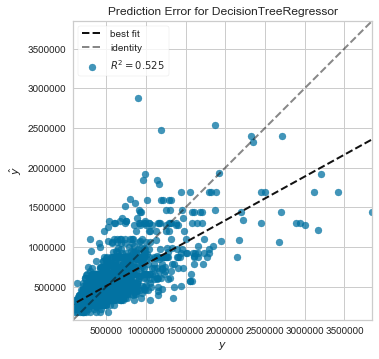

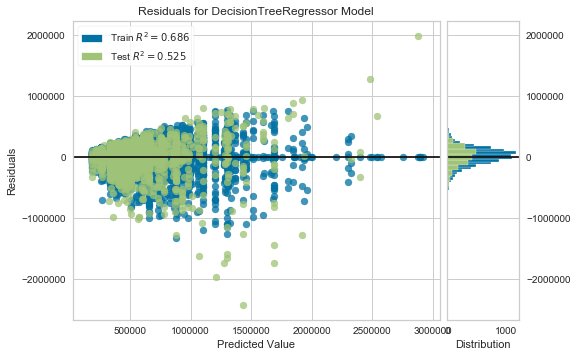

In [116]:
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import prediction_error,ResidualsPlot


visualizer = prediction_error(model2, X_train, y_train, X_test, y_test)
visualizer = ResidualsPlot(model2)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.poof()

In [119]:

a=np.array(y_test)
b=np.array(y_predicted)
Residuals = a-b
c = pd.DataFrame({"Actual Price":a,"Predicted Price":b,"Residuals":Residuals})
d=c.sample(1000)
#d.iloc[1:60]

In [121]:
Reduced_set = combined[combined['price']<3000000  ]

optimized_set = Reduced_set[Reduced_set['sqft_living']<6000]
optimized_set.shape

(21516, 21)

In [130]:
feature_cols=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'sqft_living15', 'sqft_lot15','interaction_grade_sqft_living','interaction_grade_sqft_above']


#feature_cols=['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15']
X = optimized_set[feature_cols]
y = optimized_set.price


# instantiate and fit
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)


from sklearn.tree import DecisionTreeRegressor

# Fit regression model
# Estimate the score on the entire dataset, with no missing values
model2 =  DecisionTreeRegressor(max_depth=22,random_state=0)
model2.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
model_score = model2.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("coefficient of determination R^2 of the prediction.:" ,model_score)
y_predicted = model2.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

coefficient of determination R^2 of the prediction.: 0.993449231747931
Mean squared error: 37417927450.08
Test Variance score: 0.62


In [175]:
house_train_validate_data['interaction']= house_train_validate_data['bedrooms'] * house_train_validate_data['bathrooms']
house_train_validate_data['interaction_grade_sqft_above'] = house_train_validate_data['sqft_above'] * house_train_validate_data['grade']
house_train_validate_data['interaction_grade_sqft_living']= house_train_validate_data['sqft_living'] * house_train_validate_data['grade']
house_test_data['interaction']= house_test_data['bedrooms'] * house_test_data['bathrooms']
house_test_data['interaction_grade_sqft_above'] = house_test_data['sqft_above'] * house_test_data['grade']
house_test_data['interaction_grade_sqft_living']= house_test_data['sqft_living'] * house_test_data['grade']



Reduced_set = house_train_validate_data[house_train_validate_data['price']<3000000  ]

optimized_set = Reduced_set[Reduced_set['sqft_living']<6000]
optimized_set.shape
feature_cols=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'sqft_living15', 'sqft_lot15']


#feature_cols=['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15','interaction_grade_sqft_living','interaction_grade_sqft_above']
X = optimized_set[feature_cols]
y = optimized_set.price


In [179]:
# instantiate and fit
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

X_train = house_train_validate_data[feature_cols]
y_train =house_train_validate_data.price

from sklearn.tree import DecisionTreeRegressor

# Fit regression model
# Estimate the score on the entire dataset, with no missing values
model_g =  DecisionTreeRegressor(max_depth=16,random_state=0)
model_g.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
model_score = model_g.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("coefficient of determination R^2 of the prediction.:" ,model_score)
y_predicted = model_g.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
X_test = house_test_data[feature_cols]
y_test = house_test_data.price
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

coefficient of determination R^2 of the prediction.: 0.9702422426844676
Mean squared error: 43732938275.72
Test Variance score: 0.66


In [184]:
X_test = house_test_data[feature_cols]
y_test = house_test_data['price']
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("coefficient of determination R^2 of the prediction.:" ,model_score)
y_predicted = model2.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

coefficient of determination R^2 of the prediction.: 0.9938343027722922
Mean squared error: 44410398863.94
Test Variance score: 0.65


In [128]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
# Estimate the score on the entire dataset, with no missing values
model2 =  DecisionTreeRegressor(max_depth=16,random_state=0)
model2.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
model_score = model2.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("coefficient of determination R^2 of the prediction.:" ,model_score)
y_predicted = model2.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

coefficient of determination R^2 of the prediction.: 0.9615358836364085
Mean squared error: 32698220742.04
Test Variance score: 0.67


In [186]:



Reduced_set = house_train_validate_data[house_train_validate_data['price']<3000000  ]

optimized_set = Reduced_set[Reduced_set['sqft_living']<6000]

feature_cols=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'sqft_living15', 'sqft_lot15']


#feature_cols=['bathrooms', 'sqft_living','grade','sqft_above', 'sqft_living15','interaction_grade_sqft_living','interaction_grade_sqft_above']
X = optimized_set[feature_cols]
y = optimized_set.price

# instantiate and fit
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

#X_train = house_train_validate_data[feature_cols]
#y_train =house_train_validate_data.price

from sklearn.tree import DecisionTreeRegressor

# Fit regression model
# Estimate the score on the entire dataset, with no missing values
model2 =  DecisionTreeRegressor(max_depth=16,random_state=0)
model2.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
model_score = model2.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("coefficient of determination R^2 of the prediction.:" ,model_score)
y_predicted = model2.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))


coefficient of determination R^2 of the prediction.: 0.9615358836364085
Mean squared error: 32698220742.04
Test Variance score: 0.67


In [202]:
####BACKUP 
feature_cols=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'sqft_living15', 'sqft_lot15','interaction_grade_sqft_living','interaction_grade_sqft_above']


# instantiate and fit
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

X_train = house_train_validate_data[feature_cols]
y_train =house_train_validate_data.price
X_test = house_test_data[feature_cols]
y_test = house_test_data.price
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
# Estimate the score on the entire dataset, with no missing values
model_g =  DecisionTreeRegressor(max_depth=22,random_state=0)
model_g.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
model_score = model_g.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("coefficient of determination R^2 of the prediction.:" ,model_score)
y_predicted = model_g.predict(X_test)
# The mean squared error
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))
print("RMSE: %.2f"% np.sqrt(mean_squared_error(y_test, y_predicted)))

coefficient of determination R^2 of the prediction.: 0.9938343027722922
Test Variance score: 0.70
RMSE: 195989.56


In [203]:

a=np.array(y_test)
b=np.array(y_predicted)
Residuals = a-b
c = pd.DataFrame({"Actual Price":a,"Predicted Price":b,"Residuals":Residuals})
d=c.sample(1000)
d.iloc[1:60]

,Actual Price,Predicted Price,Residuals
732,499950.0,3.261880e+05,1.737620e+05
1166,357500.0,4.250000e+05,-6.750000e+04
1889,195000.0,3.313333e+05,-1.363333e+05
1963,1518630.0,7.700000e+05,7.486300e+05
1016,280000.0,2.945000e+05,-1.450000e+04
1165,840000.0,7.400000e+05,1.000000e+05
1407,466950.0,4.100000e+05,5.695000e+04
941,860000.0,6.055714e+05,2.544286e+05
820,435000.0,3.713801e+05,6.361993e+04
1645,139000.0,2.512275e+05,-1.122275e+05


In [190]:
Reduced_set = house_train_validate_data[house_train_validate_data['price']<3000000  ]

optimized_set = Reduced_set[Reduced_set['sqft_living']<6000]
optimized_set.shape

(19310, 24)

In [197]:
####BACKUP 
feature_cols=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'sqft_living15', 'sqft_lot15','interaction_grade_sqft_living','interaction_grade_sqft_above']

X=optimized_set[feature_cols]
y=optimized_set.price
# instantiate and fit
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

#X_train = house_train_validate_data[feature_cols]
#y_train =house_train_validate_data.price
#X_test = house_test_data[feature_cols]
#y_test = house_test_data.price
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
# Estimate the score on the entire dataset, with no missing values
model_g =  DecisionTreeRegressor(max_depth=16,random_state=0)
model_g.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
model_score = model_g.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("coefficient of determination R^2 of the prediction.:" ,model_score)
y_predicted = model_g.predict(X_test)
# The mean squared error
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))
print("RMSE: %.2f"% np.sqrt(mean_squared_error(y_test, y_predicted)))

coefficient of determination R^2 of the prediction.: 0.9614006631502102
Test Variance score: 0.66
RMSE: 183245.02
